## 第零部分 初始化

In [4]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
# read the file
df = pd.read_csv('../res/input0130.csv',index_col=0)

# print the head
df.head(),df.describe()

(         date   close     log_r  label
 0  2000-01-03  289.00  0.000000    0.0
 1  2000-01-04  282.25 -0.023633    0.0
 2  2000-01-05  280.00 -0.008004    0.0
 3  2000-01-06  281.10  0.003921    1.0
 4  2000-01-07  281.75  0.002310    1.0,
              close        log_r        label
 count  5210.000000  5210.000000  5210.000000
 mean    934.660605     0.000318     0.519578
 std     464.575247     0.010700     0.499665
 min     255.550000    -0.095482     0.000000
 25%     424.235000    -0.004807     0.000000
 50%    1079.565000     0.000370     1.000000
 75%    1293.187500     0.005826     1.000000
 max    1900.230000     0.102426     1.000000)

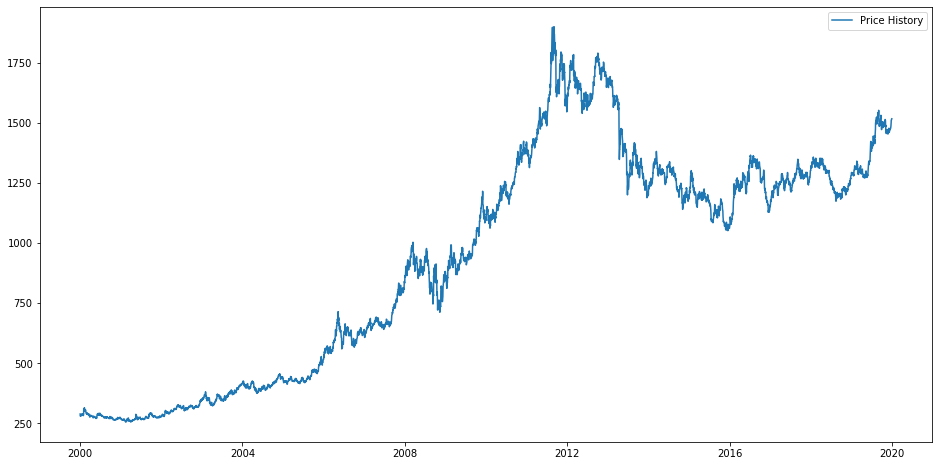

In [9]:
# setting index as date
df['Ndate'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['Ndate']

# plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Price History')
plt.legend()

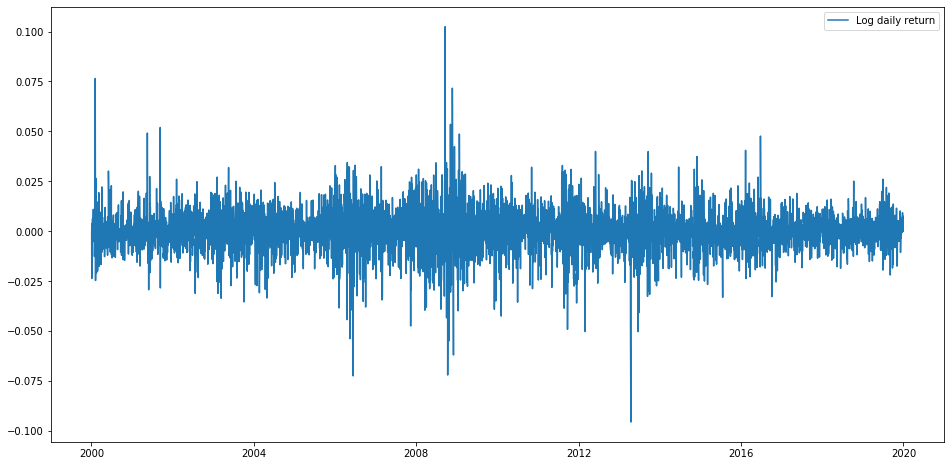

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['log_r'], label='Log daily return')
plt.legend()

Text(0.5, 1.0, 'Distribution of Log daily return')

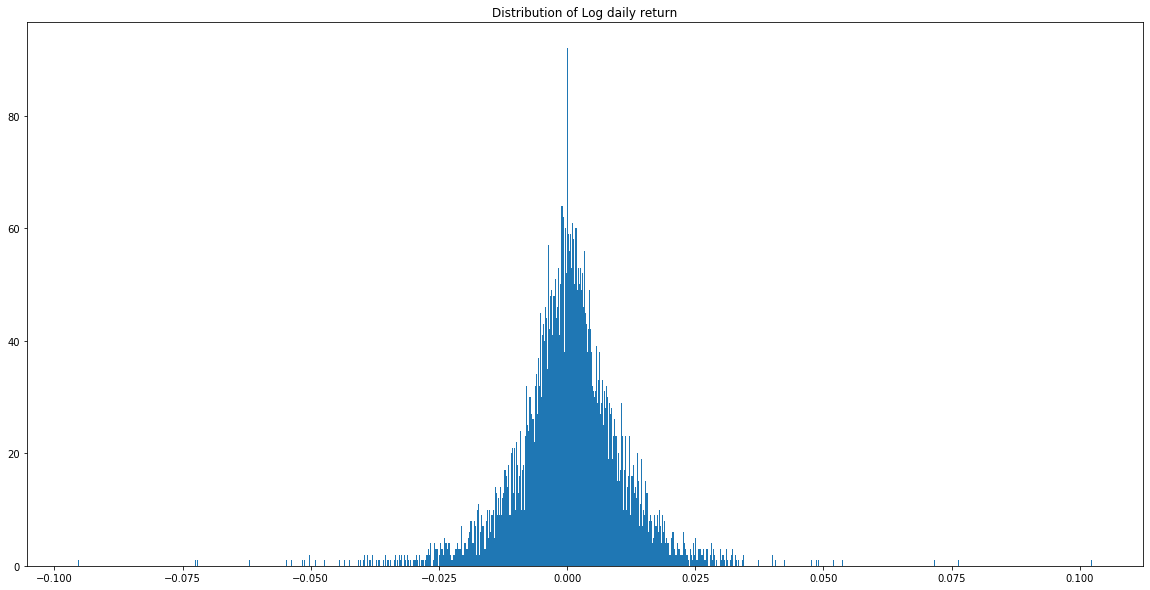

In [14]:
plt.figure(figsize=(16,8))
plt.hist(df['log_r'], label='Log daily return',bins=1000)
plt.title('Distribution of Log daily return')

In [5]:
# splitting into train and validation
# train = df[:5500].copy()
# valid = df[5500:].copy()

# df.shape, train.shape, valid.shape

((11039, 33), (5500, 33), (5539, 33))

In [17]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM 

Using TensorFlow backend.


In [16]:
#  creating dataframe
xau_key = 'log_r'
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=[xau_key])
for i in range(0,len(data)):
    new_data[xau_key][i] = data[xau_key][i]

In [18]:
#creating train and test sets
dataset = new_data.values
train = dataset[0:3000,:]
valid = dataset[3000:,:] 

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) 

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=5, verbose=2)


Epoch 1/100
 - 52s - loss: 0.0047
Epoch 2/100
 - 50s - loss: 0.0038
Epoch 3/100
 - 50s - loss: 0.0037
Epoch 4/100
 - 50s - loss: 0.0036
Epoch 5/100
 - 50s - loss: 0.0035
Epoch 6/100
 - 50s - loss: 0.0035
Epoch 7/100
 - 49s - loss: 0.0035
Epoch 8/100
 - 50s - loss: 0.0035
Epoch 9/100
 - 50s - loss: 0.0035
Epoch 10/100
 - 50s - loss: 0.0035
Epoch 11/100
 - 50s - loss: 0.0035
Epoch 12/100
 - 49s - loss: 0.0035
Epoch 13/100
 - 49s - loss: 0.0034
Epoch 14/100
 - 49s - loss: 0.0035
Epoch 15/100
 - 50s - loss: 0.0035
Epoch 16/100
 - 49s - loss: 0.0035
Epoch 17/100
 - 50s - loss: 0.0034
Epoch 18/100
 - 50s - loss: 0.0034
Epoch 19/100
 - 49s - loss: 0.0034
Epoch 20/100
 - 50s - loss: 0.0034
Epoch 21/100
 - 49s - loss: 0.0034
Epoch 22/100
 - 50s - loss: 0.0034
Epoch 23/100
 - 49s - loss: 0.0034
Epoch 24/100
 - 50s - loss: 0.0034
Epoch 25/100
 - 50s - loss: 0.0034
Epoch 26/100
 - 50s - loss: 0.0034
Epoch 27/100
 - 50s - loss: 0.0034
Epoch 28/100
 - 50s - loss: 0.0034
Epoch 29/100
 - 50s - loss: 

In [21]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []

for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [22]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.009542833231494137

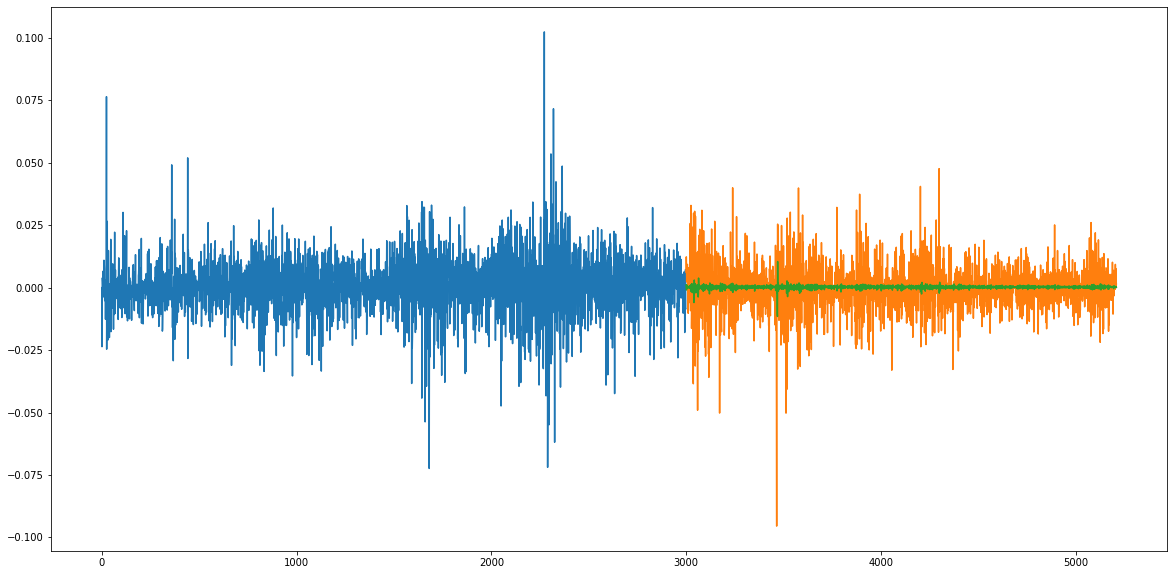

In [32]:
#for plotting
rcParams['figure.figsize'] = 20,10
train = new_data[:3000].copy()
valid = new_data[3000:].copy()
valid['Predictions'] = [x[0] for x in closing_price.tolist()]
plt.plot(train[xau_key])
plt.plot(valid[[xau_key,'Predictions']])

In [30]:
[x[0] for x in closing_price.tolist()]

,
 -0.0010236630914732814,
 -0.0014656914863735437,
 0.0007339872536249459,
 0.0015944868791848421,
 0.0006579841137863696,
 -6.0512560594361275e-05,
 -0.0006167874671518803,
 -0.0005126267205923796,
 0.00122830830514431,
 0.001112209865823388,
 2.766427132883109e-05,
 -0.0008289308752864599,
 -0.0006600442575290799,
 0.001260559307411313,
 0.0010867476230487227,
 -0.0003798719262704253,
 -0.001184091786853969,
 0.0001478383783251047,
 0.0008040096727199852,
 0.0009658304043114185,
 0.00026686827186495066,
 0.0004179780080448836,
 0.00020381741342134774,
 -0.00023991554917301983,
 -7.400745380437002e-05,
 0.00022693803475704044,
 0.0004012568388134241,
 0.0005488807801157236,
 0.00029876528424210846,
 0.00017089411267079413,
 8.259471542260144e-06,
 0.0003058135334867984,
 0.0005636496935039759,
 0.00044593506027013063,
 0.00028834331897087395,
 0.0002298339968547225,
 -0.0002486860321369022,
 -0.0001659590780036524,
 0.001034071552567184,
 0.000753840315155685,
 -0.0004024204390589148

In [24]:
type(valid)

pandas.core.frame.DataFrame

In [ ]:
# valid.to_csv('LSTM_predict_logr.csv')

## 第三部分 神经网络

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils
import keras as k
import os
 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
df = pd.read_csv('res/model1117.csv')

In [18]:
df.head()

,lag1,lag2,lag3,cbv,ccu,cfi2z,clq,ctv,djci,dji,...,ngq,rbq,sp500,tyvix,usd,usu,zcu,zsq,zwu,Target
0,0.008947,-0.015993,0.001535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.004550,0.008947,-0.015993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.004647,0.004550,0.008947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.001748,-0.004647,0.004550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.006446,0.001748,-0.004647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
Y_PRED = []
Y_TEST = []
accuracy = []
precision = []
recall = []
f1 = []
df = df.reindex(np.random.permutation(df.index))
# 黄金价格涨跌放在最后一列，列名叫‘Target’，涨和不变记为1，跌记为0
x = df.iloc[:10000, :-1]
y = df.iloc[:10000, -1]

In [20]:
# 填参数的数目
num_parameters = 31

In [21]:
# 十折
sfolder = StratifiedKFold(n_splits=10, shuffle=True, random_state=1218)
all_y_test = []
for train, test in sfolder.split(x, y):
    batch_size = 128
    max_epochs = 64
    model = k.models.Sequential()
    # 每层神经元数可调
    model.add(k.layers.Dense(units=256, activation='relu', use_bias=True, input_shape=(num_parameters, )))
    model.add(k.layers.normalization.BatchNormalization(epsilon=1e-6))
    model.add(k.layers.Dense(units=256, activation='relu', use_bias=True))
    model.add(k.layers.normalization.BatchNormalization())
    model.add(k.layers.Dense(units=256, activation='relu', use_bias=True))
    model.add(k.layers.normalization.BatchNormalization(epsilon=1e-6))
    model.add(k.layers.Dense(units=256, activation='relu', use_bias=True))
    model.add(k.layers.normalization.BatchNormalization())
    model.add(k.layers.Dropout(0.5))
    model.add(k.layers.Dense(units=2, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    x_train = x.iloc[train.tolist(), :]
    y_train = y.iloc[train.tolist()]
    model.fit(x_train, np_utils.to_categorical(y_train, num_classes=2), batch_size=batch_size, epochs=max_epochs, shuffle=True, verbose=1)
    x_test = x.iloc[test.tolist(), :]
    y_test = y.iloc[test.tolist()]
    y_test = y_test.reset_index()['Target']
    y_pred = model.predict(x_test)
    test_0_num = 0
    test_0_pred_0 = 0
    test_1_num = 0
    test_1_pred_1 = 0
    for index in range(0, len(y_test)):
        if y_test[index] == 0:
            test_0_num = test_0_num + 1
            if y_pred[index][0] < 0.5:
                test_0_pred_0 = test_0_pred_0 + 1
        else:
            test_1_num = test_1_num + 1
            if y_pred[index][1] > 0.5:
                test_1_pred_1 = test_1_pred_1 + 1
    accuracy = accuracy + [(test_1_pred_1 + test_0_pred_0) / (test_0_num + test_1_num)]
    precision = precision + [test_1_pred_1 / (test_1_pred_1 + test_0_num - test_0_pred_0)]
    recall = recall + [test_1_pred_1 / (test_1_pred_1 + test_0_pred_0)]

7/64
9000/9000 [==============================] - 1s 92us/step - loss: 0.0781 - mae: 0.1514
Epoch 58/64
9000/9000 [==============================] - 1s 89us/step - loss: 0.0760 - mae: 0.1492
Epoch 59/64
9000/9000 [==============================] - 1s 93us/step - loss: 0.0751 - mae: 0.1496
Epoch 60/64
9000/9000 [==============================] - 1s 96us/step - loss: 0.0714 - mae: 0.1449
Epoch 61/64
9000/9000 [==============================] - 1s 91us/step - loss: 0.0732 - mae: 0.1444
Epoch 62/64
9000/9000 [==============================] - 1s 92us/step - loss: 0.0708 - mae: 0.1401
Epoch 63/64
9000/9000 [==============================] - 1s 95us/step - loss: 0.0717 - mae: 0.1420
Epoch 64/64
9000/9000 [==============================] - 1s 94us/step - loss: 0.0662 - mae: 0.1340
Epoch 1/64
9001/9001 [==============================] - 2s 192us/step - loss: 0.2967 - mae: 0.4583
Epoch 2/64
9001/9001 [==============================] - 1s 102us/step - loss: 0.2589 - mae: 0.4287
Epoch 3/64
9001/9

In [22]:
model.save('4NN.model')
[accuracy, precision, recall]

[[0.6053946053946054,
  0.5004995004995005,
  0.29270729270729273,
  0.447,
  0.534,
  0.596,
  0.451,
  0.5625625625625625,
  0.46346346346346345,
  0.6916916916916916],
 [0.583793738489871,
  0.48776223776223776,
  0.3099315068493151,
  0.44499178981937604,
  0.5174216027874564,
  0.5734767025089605,
  0.43859649122807015,
  0.5441176470588235,
  0.4543828264758497,
  0.667296786389414],
 [0.523102310231023,
  0.5568862275449101,
  0.6177474402730375,
  0.6062639821029083,
  0.5561797752808989,
  0.5369127516778524,
  0.49889135254988914,
  0.5266903914590747,
  0.5485961123110151,
  0.5108538350217077]]

In [28]:
y_output = []
y_1_num = 0
y_0_num = 0
for index in range(0, len(y_pred)):
        if y_pred[index][0] < 0.5:
            y_1_num = y_1_num + 1
            y_output.append(1)
        else:
            y_0_num = y_0_num + 1
            y_output.append(0)
y_1_num,y_0_num

(691, 308)

In [29]:
test_1_num,test_0_num

(485, 514)

In [30]:
y_pred

array([[0.99821496, 0.00178522],
       [0.04463664, 0.95549417],
       [0.6658752 , 0.33405697],
       ...,
       [0.02949107, 0.9704785 ],
       [0.22157261, 0.77687734],
       [0.26825163, 0.7315385 ]], dtype=float32)

In [26]:
comp_df = pd.DataFrame(y_test)
comp_df['Out'] = pd.DataFrame(y_output)
comp_df.to_csv('test_vs_out4.csv')

In [27]:
import keras as k

def ModelPredict(input):
    k.models.load_model('4NN.model')# 加载保存下来的模型
    return model.predict(input)# 直接用加载出来的模型，对输入 input 进行预测